# Importo librerias

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io as io
from scipy.stats import linregress as lr
import seaborn as sn 
import os 
import pandas as pd

sn.set_style("whitegrid")
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.edgecolor'] = '#505b63'
mpl.rcParams['xtick.labelsize']=14
mpl.rcParams['axes.labelsize']=14
mpl.rcParams['ytick.labelsize']=14
mpl.rcParams['axes.titlesize']=17
mpl.rcParams['figure.titlesize']=20
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams["legend.title_fontsize"]=15
             

# Acero

### Cálculo de dureza

In [84]:
hv=[259 ,414 ,229]
print(np.mean(hv))
print(np.std(hv))

hv1=[259 ,229]
print(np.mean(hv1))
print(np.std(hv1))

300.6666666666667
81.06924338010207
244.0
15.0


### Diagramas tension deformación ingenieriles

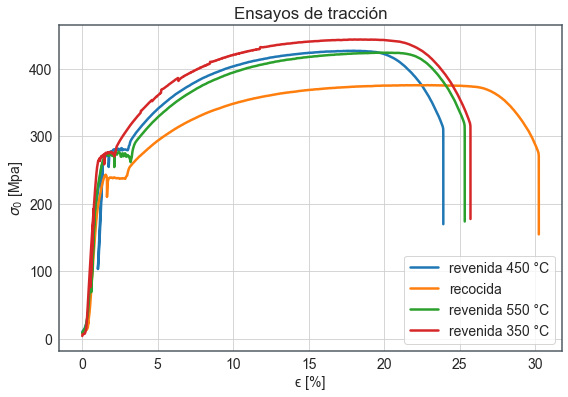

In [151]:
revenida_350= pd.read_csv('Materiales_rolo/probeta_revenida350.csv',header=0,delimiter=';')
revenida_450= pd.read_csv('Materiales_rolo/probeta_revenida450.csv',header=0,delimiter=';')
revenida_550= pd.read_csv('Materiales_rolo/probeta_revenida550.csv',header=0,delimiter=';')
recocida_200= pd.read_csv('Materiales_rolo/probeta_recocida_200.csv',header=0,delimiter=';')

l0 = 45#mm
d0_350 = [4.88, 4.91, 4.90, 4.90, 4.87] #mm
d0_550 = [4.74, 4.75, 4.76, 4.74, 4.78] #mm
d0_450 = [4.87, 4.89, 4.84, 4.85, 4.91] #mm
d0_200 = [4.85, 4.84, 4.82, 4.83, 4.83] #mm

A_350 = np.pi*0.25*np.mean(d0_350)**2
delta_A_350 = np.pi*0.5*np.mean(d0_350)*np.std(d0_350)
A_450 = np.pi*0.25*np.mean(d0_450)**2
delta_A_450 = np.pi*0.5*np.mean(d0_450)*np.std(d0_450)
A_550 = np.pi*0.25*np.mean(d0_550)**2
delta_A_550 = np.pi*0.5*np.mean(d0_550)*np.std(d0_550)
A_200 = np.pi*0.25*np.mean(d0_200)**2
delta_A_200 = np.pi*0.5*np.mean(d0_200)*np.std(d0_200)

d0_350_n = [2.92, 2.98, 2.90, 2.98, 2.95] #mm
d0_550_n = [2.99, 3.09, 3.07, 3.09, 3.01] #mm
d0_450_n = [3.05, 3.09, 3.07, 3.04, 3.06] #mm


A_350_n = np.pi*0.25*np.mean(d0_350_n)**2
delta_A_350_n = np.pi*0.5*np.mean(d0_350)*np.std(d0_350)
A_450_n = np.pi*0.25*np.mean(d0_450_n)**2
delta_A_450_n = np.pi*0.5*np.mean(d0_450)*np.std(d0_450)
A_550_n = np.pi*0.25*np.mean(d0_550_n)**2
delta_A_550_n = np.pi*0.5*np.mean(d0_550)*np.std(d0_550)

reduction = [A_350_n/A_350, A_450_n/A_450, A_550_n/A_550]
delta_reduction = [1/A_350_n*delta_A_350+A_350_n/A_350**2*delta_A_350_n, 1/A_450_n*delta_A_450+A_450_n/A_450**2*delta_A_450_n, 1/A_550_n*delta_A_550+A_550_n/A_550**2*delta_A_550_n]

elongacion = [np.max(revenida_350["Extension mm"].fillna(0).add(7.372390))/l0*100, np.max(revenida_450["Extension mm"].fillna(0))/l0*100, np.max(revenida_550["Extension mm"].fillna(0))/l0*100, np.max(recocida_200["Extension mm"].fillna(0))/l0*100]

fig = plt.figure(figsize=(9,6))
plt.plot(pd.to_numeric(revenida_450["Extension mm"].fillna(0))/l0*100 , pd.to_numeric(revenida_450["Load N"].fillna(0))/A_350, label='revenida 450 °C')
#plt.scatter(pd.to_numeric(revenida_450["Extension mm"].fillna(0)[825])/l0*100 , pd.to_numeric(revenida_450["Load N"].fillna(0)[825])/A_350, label='revenida 450 °C')
plt.plot(pd.to_numeric(recocida_200["Extension mm"].fillna(0))/l0*100 , pd.to_numeric(recocida_200["Load N"].fillna(0))/A_450, label='recocida')
#plt.scatter(pd.to_numeric(recocida_200["Extension mm"].fillna(0)[852])/l0*100 , pd.to_numeric(recocida_200["Load N"].fillna(0)[852])/A_450, label='recocida')
plt.plot(pd.to_numeric(revenida_550["Extension mm"].fillna(0))/l0*100 , pd.to_numeric(revenida_550["Load N"].fillna(0))/A_550, label='revenida 550 °C')
#plt.scatter(pd.to_numeric(revenida_550["Extension mm"].fillna(0)[837])/l0*100 , pd.to_numeric(revenida_550["Load N"].fillna(0)[837])/A_550, label='revenida 550 °C')
plt.plot(pd.to_numeric(revenida_350["Extension mm"].fillna(0)).add(7.372390)/l0*100 , pd.to_numeric(revenida_350["Load N"].fillna(0))/A_200, label='revenida 350 °C')
#plt.scatter(pd.to_numeric(revenida_350["Extension mm"].fillna(0)).add(7.372390)[1462]/l0*100 , pd.to_numeric(revenida_350["Load N"].fillna(0)[1462])/A_200, label='revenida 350 °C')
plt.xlabel("ϵ [%]")
plt.ylabel(r"$\sigma_0$ [Mpa]")
plt.title('Ensayos de tracción')
plt.legend()
plt.savefig("ensayo_traccion.pdf",format="pdf")
plt.show()

In [159]:
print(A_350, delta_A_350)

18.795884952644833 0.11293620784473386


In [163]:
print('Tensión UTS [MPa]:')
print('\tUTS 350 {} +- {}'.format(revenida_350['Load N'].to_numpy()[1460]/A_350, 1/A_350*0.1+revenida_350['Load N'].to_numpy()[1460]/A_350**2*delta_A_350))
print('\tUTS 450 {} +- {}'.format(revenida_450['Load N'].to_numpy()[825]/A_450, 1/A_450*0.1+revenida_450['Load N'].to_numpy()[825]/A_450**2*delta_A_450))
print('\tUTS 550 {} +- {}'.format(revenida_550['Load N'].to_numpy()[837]/A_550, 1/A_550*0.1+revenida_550['Load N'].to_numpy()[837]/A_550**2*delta_A_550))
print('\tUTS 200 {} +- {}'.format(recocida_200['Load N'].to_numpy()[852]/A_200, 1/A_200*0.1+recocida_200['Load N'].to_numpy()[852]/A_200**2*delta_A_200))
print('Tensión de rotura [MPa]:')
print('\tUTS 350 {} +- {}'.format(np.max(revenida_350['Load N'])/A_350, 1/A_350*0.1+np.max(revenida_350['Load N'])/A_350**2*delta_A_350))
print('\tUTS 450 {} +- {}'.format(np.max(revenida_450['Load N'])/A_450, 1/A_450*0.1+np.max(revenida_450['Load N'])/A_450**2*delta_A_450))
print('\tUTS 550 {} +- {}'.format(np.max(revenida_550['Load N'])/A_550, 1/A_550*0.1+np.max(revenida_550['Load N'])/A_550**2*delta_A_550))
print('\tUTS 200 {} +- {}'.format(np.max(recocida_200['Load N'])/A_200, 1/A_200*0.1+np.max(recocida_200['Load N'])/A_200**2*delta_A_200))
print('Redución de area')
for i in range(len(reduction)):
    print('\tReducción '+str(350+100*i)+': {} +- {}'.format(100-reduction[i]*100, delta_reduction[i]*100))
print('Elongación')
for i in range(len(elongacion)):
    print('\tElongacion '+str(350+100*i)+': {} +- {}'.format(elongacion[i], elongacion[i]/l0))

Tensión UTS [MPa]:
	UTS 350 314.0042628942305 +- 1.8920338567698647
	UTS 450 321.488320438298 +- 3.385544144047633
	UTS 550 315.85580116165187 +- 1.9943996680578364
	UTS 200 278.8044921855221 +- 1.1818074966191514
Tensión de rotura [MPa]:
	UTS 350 432.8150028847286 +- 2.6059153504882766
	UTS 450 429.9954227361796 +- 4.526405320824601
	UTS 550 423.7425865037368 +- 2.6737019605450163
	UTS 200 381.45168222206667 +- 1.6149064002284157
Redución de area
	Reducción 350: 63.734590290085976 +- 1.8747324614729448
	Reducción 450: 60.500116614223955 +- 3.077128993730147
	Reducción 550: 58.839435347405356 +- 1.7888903716923583
Elongación
	Elongacion 350: 25.711893333333336 +- 0.5713754074074074
	Elongacion 450: 23.912244444444443 +- 0.5313832098765432
	Elongacion 550: 25.332133333333335 +- 0.5629362962962964
	Elongacion 650: 30.23795555555556 +- 0.6719545679012346


# Caracterización de cinta Niquel Titanio

### Estabilización

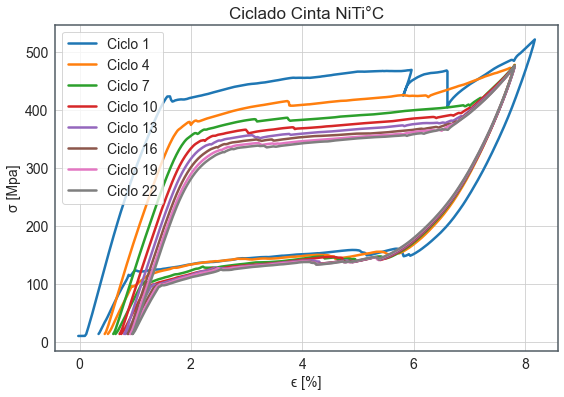

In [23]:
ciclado = pd.read_csv('Materiales_rolo/ciclado_labo2_grupo1_2021.csv',header=0,delimiter=';')

l1=3.25
l2=70.2
t=0.66
A= t*l1
ext= l2
rest = pd.to_numeric(ciclado["Extension mm"][1])
aux_ciclado= ciclado.copy()
aux_ciclado.loc[aux_ciclado['Cycle Count '] == 0, 'Cycle Count '] = 1

fig = plt.figure(figsize=(9,6))
for i in range(1,24,3):
    cicle=aux_ciclado[aux_ciclado["Cycle Count "]==i]
    plt.plot((pd.to_numeric(cicle["Extension mm"].fillna(0))-rest)/ext *100 , pd.to_numeric(cicle["Load N"]/A).fillna(0),label='Ciclo {}'.format(i))

plt.grid(True)
plt.xlabel("ϵ [%]")
plt.ylabel("σ [Mpa]")
plt.title("Ciclado Cinta NiTi°C")
plt.legend()
plt.savefig("ciclado_estabilizacion.pdf", format='pdf')
plt.show()

### Ciclado en función de la temperatura

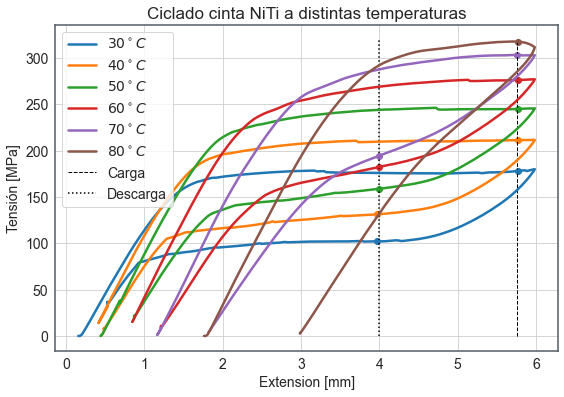

In [141]:
ciclado= pd.read_csv('Materiales_rolo/cinta_temperaturas.csv',header=0,delimiter=';')

t=0.66
l1=3.25
A=t*l1

e_1 = pd.to_numeric(ciclado["Extension mm"].fillna(0)).to_numpy()[0:1110]/ext *100
e_2 = pd.to_numeric(ciclado["Extension mm"].fillna(0)).to_numpy()[1100:2110]/ext *100
e_3 = pd.to_numeric(ciclado["Extension mm"].fillna(0)).to_numpy()[2110:3150]/ext *100
e_4 = pd.to_numeric(ciclado["Extension mm"].fillna(0)).to_numpy()[3150:3880]/ext *100
e_5 = pd.to_numeric(ciclado["Extension mm"].fillna(0)).to_numpy()[3880:4290]/ext *100
e_6 = pd.to_numeric(ciclado["Extension mm"].fillna(0)).to_numpy()[4765:]/ext *100

s_1 = pd.to_numeric(ciclado["Load N"]/A).fillna(0).to_numpy()[0:1110]/A
s_2 = pd.to_numeric(ciclado["Load N"]/A).fillna(0).to_numpy()[1100:2110]/A
s_3 = pd.to_numeric(ciclado["Load N"]/A).fillna(0).to_numpy()[2110:3150]/A
s_4 = pd.to_numeric(ciclado["Load N"]/A).fillna(0).to_numpy()[3150:3880]/A
s_5 = pd.to_numeric(ciclado["Load N"]/A).fillna(0).to_numpy()[3880:4290]/A
s_6 = pd.to_numeric(ciclado["Load N"]/A).fillna(0).to_numpy()[4765:]/A

baseline = np.min(np.array([np.min(s_1), np.min(s_2), np.min(s_3), np.min(s_4), np.min(s_5), np.min(s_6)]))

s_1 -= baseline
s_2 -= baseline
s_3 -= baseline
s_4 -= baseline
s_5 -= baseline
s_6 -= baseline

i_1 = np.where(e_1 == np.max(e_1))[0][0]-10
i_2 = np.where(e_2 == np.max(e_2))[0][0]-10
i_3 = np.where(e_3 == np.max(e_3))[0][0]-10
i_4 = np.where(e_4 == np.max(e_4))[0][0]-10
i_5 = np.where(e_5 == np.max(e_5))[0][0]-10
i_6 = np.where(e_6 == np.max(e_6))[0][0]-11

fig = plt.figure(figsize=(9,6))
plt.plot(e_1, s_1, label=r'$30^\circ C$')
plt.scatter(e_1[i_1], s_1[i_1])
plt.scatter(e_1[340], s_1[340], color='C0')
plt.plot(e_2, s_2, label=r'$40^\circ C$')
plt.scatter(e_2[i_2], s_2[i_2])
plt.scatter(e_2[354], s_2[354], color='C1')
plt.plot(e_3, s_3, label=r'$50^\circ C$')
plt.scatter(e_3[i_3], s_3[i_3])
plt.scatter(e_3[598], s_3[598], color='C2')
plt.plot(e_4, s_4, label=r'$60^\circ C$')
plt.scatter(e_4[i_4], s_4[i_4])
plt.scatter(e_4[320], s_4[320], color='C3')
plt.plot(e_5, s_5, label=r'$70^\circ C$')
plt.scatter(e_5[i_5], s_5[i_5])
plt.scatter(e_5[315], s_5[315], color='C4')
plt.plot(e_6, s_6, label=r'$80^\circ C$')
plt.scatter(e_6[i_6], s_6[i_6])
plt.vlines(5.75, 0, 320, linestyle='dashed', linewidth=1, color='black', label='Carga')
plt.vlines(4, 0, 320, linestyle='dotted', linewidth=1.5, color='black', label='Descarga')
plt.xlabel("Extension [mm]")
plt.ylabel('Tensión [MPa]')
plt.title("Ciclado cinta NiTi a distintas temperaturas")
plt.legend()
plt.savefig("ciclados_temperatura.pdf", format='pdf')
plt.show()

In [ ]:
print('Deformación carga:', )

### Clausius-Clapeyron

D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


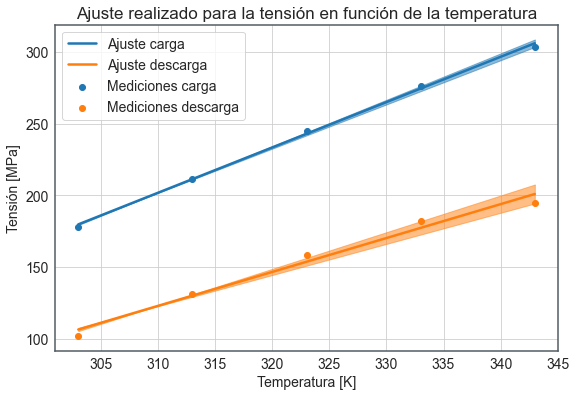

d_sigma/d_T carga = (3.1518094337674762 +- 0.07678779797853762) MPa/K
d_sigma/d_T descarga = (2.3580554333001884 +- 0.19327514533548143) MPa/K


In [176]:
s_1_c = s_1[i_1]
s_2_c = s_2[i_2]
s_3_c = s_3[i_3]
s_4_c = s_4[i_4]
s_5_c = s_5[i_5]
s_6_c = s_6[i_6]
s_c = np.array([s_1_c, s_2_c, s_3_c, s_4_c, s_5_c])#, s_6_c])
s_1_d = s_1[340]
s_2_d = s_2[354]
s_3_d = s_3[598]
s_4_d = s_4[320]
s_5_d = s_5[315]
s_d = np.array([s_1_d, s_2_d, s_3_d, s_4_d, s_5_d])#, s_6_c])

t_1_c = 273+30
t_2_c = 273+40
t_3_c = 273+50
t_4_c = 273+60
t_5_c = 273+70
t_6_c = 273+80
t_c = np.array([t_1_c, t_2_c, t_3_c, t_4_c, t_5_c])#, t_6_c])
t_d = t_c

p_c, cov_c = np.polyfit(t_c-np.mean(t_c), s_c-np.mean(s_c), deg=1, cov=True)
cov_c = np.sqrt(cov_c)
error_c = cov_c[0,0]*(t_c-np.mean(t_c))+cov_c[1,1]

p_d, cov_d = np.polyfit(t_d-np.mean(t_d), s_d-np.mean(s_d), deg=1, cov=True)
cov_d = np.sqrt(cov_d)
error_d = cov_d[0,0]*(t_d-np.mean(t_d))+cov_d[1,1]

t_c_large = np.linspace(t_1_c, t_5_c, 1000)
t_d_large = np.linspace(t_1_c, t_5_c, 1000)
error_c_large = cov_c[0,0]*(t_c_large-np.mean(t_c))+cov_c[1,1]
error_d_large = cov_d[0,0]*(t_d_large-np.mean(t_d))+cov_d[1,1]

plt.figure(figsize=(9,6))
plt.scatter(t_c, s_c, label='Mediciones carga')
plt.plot(t_c, np.polyval(p_c, t_c-np.mean(t_c))+np.mean(s_c), label='Ajuste carga')
plt.fill_between(t_c_large, np.polyval(p_c, t_c_large-np.mean(t_c))+np.mean(s_c)+error_c_large, np.polyval(p_c, t_c_large-np.mean(t_c))+np.mean(s_c)-error_c_large,
                color='C0', alpha=0.5)
plt.scatter(t_d, s_d, label='Mediciones descarga')
plt.plot(t_d, np.polyval(p_d, t_d-np.mean(t_d))+np.mean(s_d), label='Ajuste descarga')
plt.fill_between(t_d_large, np.polyval(p_d, t_d_large-np.mean(t_d))+np.mean(s_d)+error_d_large, np.polyval(p_d, t_d_large-np.mean(t_d))+np.mean(s_d)-error_d_large,
                color='C1', alpha=0.5)
plt.title('Ajuste realizado para la tensión en función de la temperatura')
plt.xlabel('Temperatura [K]')
plt.ylabel('Tensión [MPa]')
plt.legend()
plt.savefig('clausius_clapeyron.pdf', format='pdf')
plt.show()

print('d_sigma/d_T carga = ({} +- {}) MPa/K'.format(p_c[0], cov_c[0,0]))
print('d_sigma/d_T descarga = ({} +- {}) MPa/K'.format(p_d[0], cov_d[0,0]))

# Cobre Aluminio Berilio 

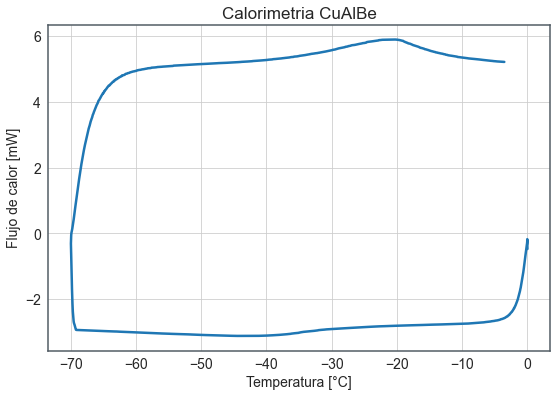

In [26]:
calorimetria = pd.read_csv('Materiales_rolo/CuAlBe 2.csv', delimiter=' ')

tiempo = pd.to_numeric(calorimetria["1"].fillna(0))*60
Temp = pd.to_numeric(calorimetria["2"].fillna(0))
Qlor = pd.to_numeric(calorimetria["3"].fillna(0))

fig = plt.figure(figsize=(9,6))
plt.plot(Temp, Qlor,label='CuAlBe DSC')
#plt.plot(pd.to_numeric(calorimetria["3"].fillna(0)) , pd.to_numeric(calorimetria["4"].fillna(0)))
plt.grid(True)
plt.xlabel("Temperatura [°C]")
plt.ylabel("Flujo de calor [mW]")
plt.title("Calorimetria CuAlBe")
plt.savefig("calorimetria_cualbe.pdf",format="pdf")
plt.show()

### Temperatura de comienzo de transformación y de pico de flujo de calor

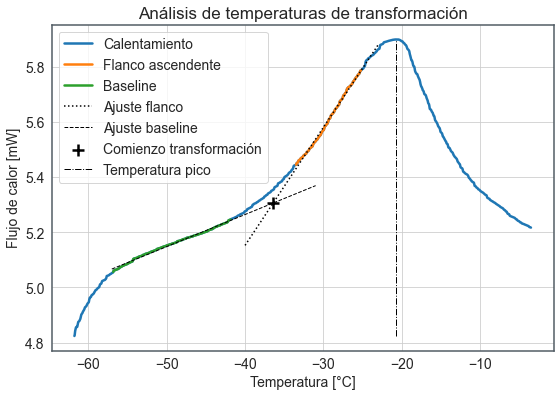

In [27]:
x_lineal = Temp[5250:5700]
y_lineal = Qlor[5250:5700]

p_lineal, cov_lineal = np.polyfit(x_lineal, y_lineal, 1, cov=True)
cov_lineal = np.sqrt(cov_lineal)

x_rampa = Temp[5950:6200]
y_rampa = Qlor[5950:6200]

p_rampa, cov_rampa = np.polyfit(x_rampa, y_rampa, 1, cov=True)
cov_rampa = np.sqrt(cov_rampa)

x_aux_lineal = np.linspace(-57, -31, 100)
x_aux_rampa = np.linspace(-40, -23, 100)

fig = plt.figure(figsize=(9,6))
plt.plot(Temp[5100:], Qlor[5100:], label='Calentamiento')
plt.plot(x_rampa, y_rampa, label='Flanco ascendente')
plt.plot(x_lineal, y_lineal, label='Baseline')
plt.plot(x_aux_rampa, p_rampa[0]*x_aux_rampa+p_rampa[1], color='black', linestyle='dotted', linewidth=1.5, label='Ajuste flanco')
plt.plot(x_aux_lineal, p_lineal[0]*x_aux_lineal+p_lineal[1], color='black', linestyle='dashed', linewidth=1, label='Ajuste baseline')
x_comienzo = (p_lineal[1]-p_rampa[1])/(p_rampa[0]-p_lineal[0])
plt.scatter(x_comienzo, p_rampa[0]*x_comienzo+p_rampa[1], label='Comienzo transformación', color='black', marker='+', s=150)
plt.vlines(Temp[np.argmax(Qlor)], np.min(Qlor[5100:]), np.max(Qlor[5100:]), linestyle='dashdot', color='black', linewidth=1, label='Temperatura pico')
plt.xlabel("Temperatura [°C]")
plt.ylabel("Flujo de calor [mW]")
plt.title("Análisis de temperaturas de transformación")
plt.savefig("calorimetria_temperaturas.pdf",format="pdf")
plt.legend()
plt.show()

In [28]:
print('Tempratura comienzo transición: ', x_comienzo+273)
print('Temperatura pico: ', Temp[np.argmax(Qlor)]+273)

Tempratura comienzo transición:  236.58496134657952
Temperatura pico:  252.20648


### Calor latente de transformación

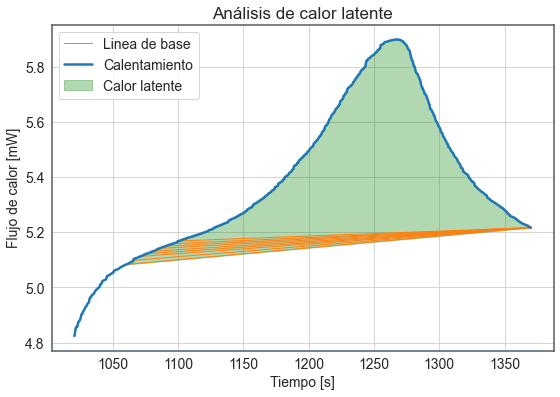

In [29]:
from scipy import integrate
area_trapz = []
area_simps = []
fig = plt.figure(figsize=(9,6))
for point in [5300, 5325, 5350, 5375, 5400, 5425, 5450, 5475, 5500]: 
    x_bl = np.array([tiempo[point], tiempo[len(Temp)-1]])
    y_bl = np.array([Qlor[point], Qlor[len(Temp)-1]])
    m_bl = (y_bl[1]-y_bl[0])/(x_bl[1]-x_bl[0])
    b_bl = y_bl[0]-m_bl*x_bl[0]
    x_bl = np.linspace(tiempo[point], tiempo[len(Temp)-1], len(tiempo)-point)
    y_bl = m_bl*x_bl+b_bl
    dif = Qlor[point:] - y_bl
    area_trapz.append(np.trapz(dif, x_bl))
    area_simps.append(integrate.simpson(dif, x_bl))
    if point==5300:
        plt.fill_between(x_bl, y_bl, Qlor[5300:], color='green', alpha=0.3, label='Calor latente')
        plt.plot(x_bl, y_bl, color='C1', linewidth=1, label='Linea de base')
    else:
        plt.plot(x_bl, y_bl, color='C1', linewidth=1)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Flujo de calor [mW]")
    plt.title("Análisis de calor latente")
plt.plot(tiempo[5100:], Qlor[5100:], label='Calentamiento')
plt.legend()
plt.savefig("calorimetria_calor_latente.pdf",format="pdf")
plt.show()

In [30]:
print('Area según simpson = ({} +- {})J'.format(np.mean(area_simps), np.std(area_simps)))
print('Area según trapecios = ({} +- {})J'.format(np.mean(area_trapz), np.std(area_trapz)))

m = 56/1000**2 #Kg
dm = 0.01/1000**2 #Kg
L = 81/1000 #J
dL = 3/1000 #J
l = L/m
dl = l*np.sqrt((dL/L)**2+(dm/m)**2)
print('Calor latente de transformación=({} +- {})J/Kg'.format(l, dl))

Area según simpson = (81.02391669983257 +- 3.32418733316226)J
Area según trapecios = (81.02373399993927 +- 3.3241722906236)J
Calor latente de transformación=(1446.4285714285716 +- 53.57205123317076)J/Kg
